In [36]:
from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates


In [37]:
# Load and preprocess data
utilities_df = pd.read_csv('Utilities.csv')
utilities_df.set_index('Company', inplace=True)
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))



In [38]:
utilities_df

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,1.06,9.2,151.0,54.4,1.6,9077.0,0.0,0.628
Boston,0.89,10.3,202.0,57.9,2.2,5088.0,25.3,1.555
Central,1.43,15.4,113.0,53.0,3.4,9212.0,0.0,1.058
Commonwealth,1.02,11.2,168.0,56.0,0.3,6423.0,34.3,0.700
NY,1.49,8.8,192.0,51.2,1.0,3300.0,15.6,2.044
Florida,1.32,13.5,111.0,60.0,-2.2,11127.0,22.5,1.241
Hawaiian,1.22,12.2,175.0,67.6,2.2,7642.0,0.0,1.652
Idaho,1.10,9.2,245.0,57.0,3.3,13082.0,0.0,0.309
Kentucky,1.34,13.0,168.0,60.4,7.2,8406.0,0.0,0.862


In [39]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(utilities_df)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=utilities_df.index)

In [40]:
memb

Company
Arizona         4
Boston          2
Central         4
Commonwealth    2
NY              5
Florida         4
Hawaiian        0
Idaho           1
Kentucky        0
Madison         2
Nevada          3
New England     2
Northern        0
Oklahoma        4
Pacific         2
Puget           3
San Diego       2
Southern        4
Texas           1
Wisconsin       0
United          2
Virginia        4
dtype: int32

In [41]:
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  Hawaiian , Kentucky, Northern, Wisconsin
1 :  Idaho, Texas
2 :  Boston , Commonwealth, Madison , New England, Pacific , San Diego, United
3 :  Nevada, Puget
4 :  Arizona , Central , Florida , Oklahoma, Southern, Virginia
5 :  NY


In [42]:
utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)

In [43]:
utilities_df_norm

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
Company,,,,,,,,
Arizona,-0.300057,-0.700750,-0.426938,-0.591310,-0.538611,0.046983,-0.731447,-0.873765
Boston,-1.243092,-0.199030,0.840322,0.211704,-0.341667,-1.103127,0.810687,0.832436
Central,1.752432,2.127130,-1.371171,-0.912516,0.052220,0.085906,-0.731447,-0.082323
Commonwealth,-0.521947,0.211469,-0.004518,-0.224218,-0.965322,-0.718219,1.359271,-0.741244
NY,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470
Florida,1.142233,1.260521,-1.420868,0.693512,-1.785921,0.638040,0.640016,0.254499
Hawaiian,0.587506,0.667579,0.169420,2.437200,-0.341667,-0.366757,-0.731447,1.010970
Idaho,-0.078166,-0.700750,1.908797,0.005214,0.019396,1.201706,-0.731447,-1.460904
Kentucky,1.253178,1.032466,-0.004518,0.785285,1.299530,-0.146480,-0.731447,-0.443073


In [44]:
# Normalized distance


kmeans = KMeans(n_clusters=8, random_state=0).fit(utilities_df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=utilities_df_norm.index)


memb


Company
Arizona         7
Boston          2
Central         7
Commonwealth    2
NY              4
Florida         0
Hawaiian        1
Idaho           3
Kentucky        7
Madison         2
Nevada          6
New England     1
Northern        2
Oklahoma        0
Pacific         1
Puget           3
San Diego       5
Southern        7
Texas           0
Wisconsin       2
United          1
Virginia        2
dtype: int32

In [45]:
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

0 :  Florida , Oklahoma, Texas
1 :  Hawaiian , New England, Pacific , United
2 :  Boston , Commonwealth, Madison , Northern, Wisconsin, Virginia
3 :  Idaho, Puget
4 :  NY
5 :  San Diego
6 :  Nevada
7 :  Arizona , Central , Kentucky, Southern


   Fixed_charge       RoR      Cost  Load_factor  Demand_growth     Sales  \
0      0.421088  0.758801 -1.603088    -0.545424      -1.381092  0.727035   
1     -0.147507 -0.415682  0.299873     1.427696      -0.300637 -0.630137   
2     -0.216848  0.249478  0.326792    -0.270105       0.085044 -0.526630   
3      0.088252 -0.541112  1.995766    -0.109502       0.987702  1.621068   
4      2.085268 -0.883194  0.591840    -1.325495      -0.735555 -1.618644   
5     -1.964237 -1.977857 -0.799662     1.129434       1.890361 -0.922638   
6     -2.019709 -1.476137  0.119723    -1.256665       1.069762  2.458495   
7      0.587506  0.827217 -0.563603    -0.195539       0.158898  0.084969   

    Nuclear  Fuel_Cost  
0 -0.274292  -0.517309  
1 -0.717732   1.221254  
2  1.470004  -0.369144  
3 -0.731447  -1.174696  
4  0.219434   1.732470  
5 -0.225529   1.504241  
6 -0.731447  -0.616086  
7 -0.731447  -0.347364  


(-0.5, 7.5)

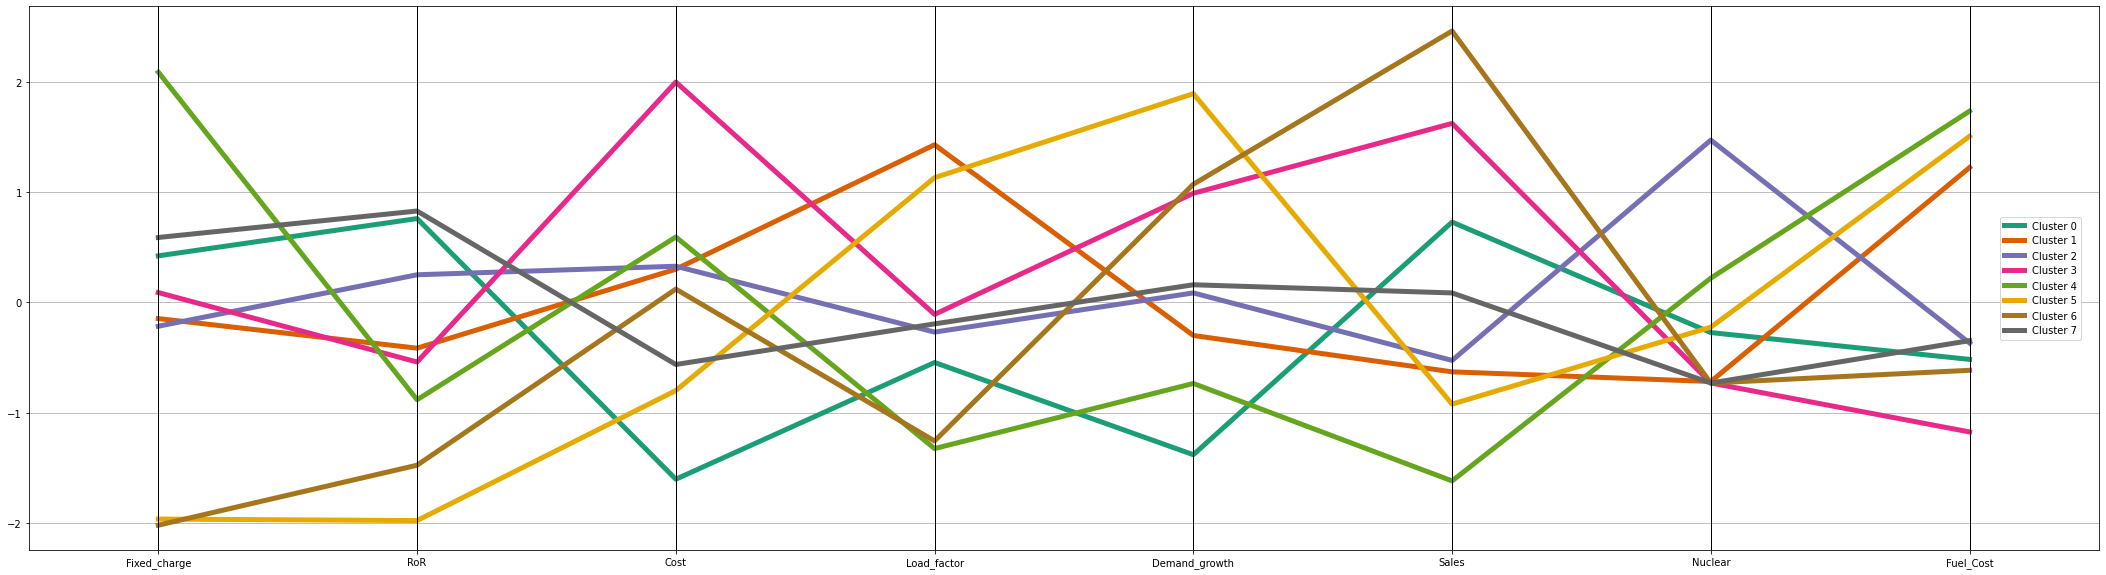

In [46]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=utilities_df_norm.columns)
print(centroids)


centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
fig=plt.figure(figsize=(10,10),facecolor='white')
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)

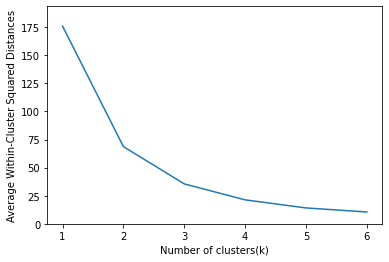

In [47]:
fig, ax = plt.subplots(facecolor='white')
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(utilities_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia', ax=ax)
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
ax.patch.set_facecolor('white')
plt.show()